<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Tree_Based_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tree Based models

### Decision Trees for classification
* Given a labelled dataset a classification tree asks a set of if-else questions to infer the labels.
* Can capture non-linear features.
* Dont require scaling.
* Each if else question that the tree has uses 1 feature and 1 split point
* Tree has a max_depth paramenter
* A classification tree makes rectangular decision boundaries, because at each split only 1 feature is involved.

#### Basic Classification Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [2]:
cancer=pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

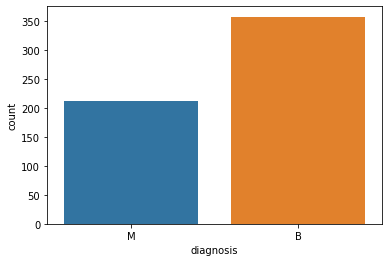

In [3]:
# Counting the number of Malignant and bening
sns.countplot(x='diagnosis',data=cancer)

In [4]:
cancer['diagnosis']=np.where(cancer.diagnosis=='M',1,0)

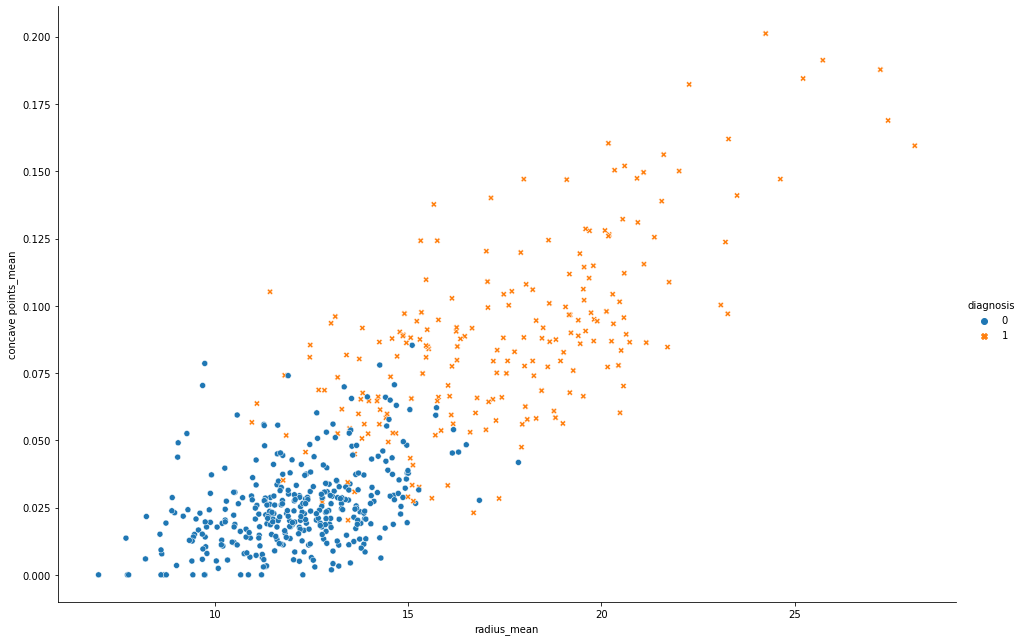

In [5]:
sns.relplot(x='radius_mean',y='concave points_mean',kind='scatter',hue='diagnosis',style='diagnosis',height=9,aspect=1.5,data=cancer)

In [6]:
X=cancer.loc[:,['radius_mean','concave points_mean']]
y=cancer.diagnosis

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [8]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [9]:
y_pred=dt.predict(X_test)

In [10]:
accuracy_score(y_test,y_pred)

0.8771929824561403

#### Classification tree learning
* Root node is the 1st node and has no parent nodes.
* Leaf nodes are the last nodes and have no children. They are the purest nodes given the criteria (max_depth, entropy etc).
* The tree chooses which feature to split on based on maximizing some information gain criteria
* IG metrics (Gini index and entropy)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred1=logreg.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8771929824561403

### Regression Tree
* Decision trees can be used for regression problems
* In this case since the target variable/label is continous its impurity is measured using the Mean Squared Error metric 
* The predicted valu is the average of the target value in that leaf

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13)

In [14]:
auto=pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv')

Text(0, 0.5, 'MPG')

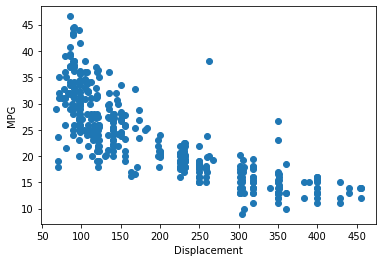

In [15]:
fig,ax=plt.subplots()
ax.scatter(x=auto.displ,y=auto.mpg)
ax.set_xlabel('Displacement')
ax.set_ylabel('MPG')

In [16]:
X=auto.loc[:,['displ']]
y=auto.mpg
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [21]:
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error as MSE

In [26]:
mse_lr=MSE(y_test,y_pred_lr)
mse_dt=MSE(y_test,y_pred_dt)

In [27]:
print('RMSE Linear Regression is ',mse_lr**(1/2))
print('RMSE Decison Tree is ',mse_dt**(1/2) )

RMSE Linear Regression is  4.183365413828921
RMSE Decison Tree is  3.662288965535905


Text(0, 0.5, 'MPG')

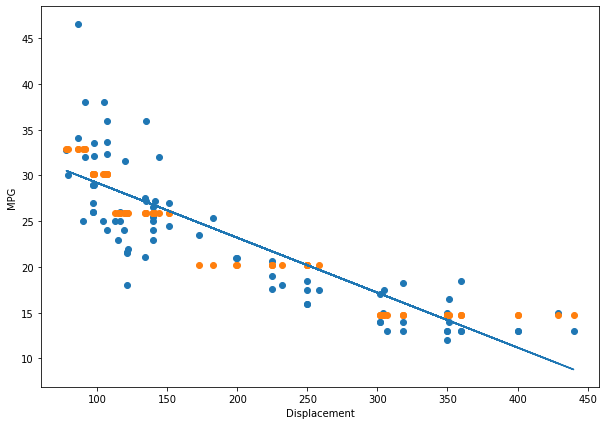

In [28]:
fig,ax=plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)
ax.scatter(x=X_test,y=y_test)
ax.plot(X_test,y_pred_lr,label='Regression_prediction')
ax.scatter(X_test,y_pred_dt,label='Decision Tree prediction')
ax.set_xlabel('Displacement')
ax.set_ylabel('MPG')


In [29]:
#from sklearn.model_selection import KFold,cross_val_score

### Ensemble Learning and Bias/variance tradeoff
* Supervised learning assumes a mapping between features and labels. y=f(x).
In this case the f is an unknown function. In reality there is always some randomness so the object of learning is to estimate f(hat) close to the function f.
* f(hat) should have good predictability on unseen test data.
* **Overfitting** is when f(hat) fits to the noise in the training data. Leads to poor prediction on unseen data. Low train set error, high test set error.
* **Underfitting** is when f(hat) is not flexible enough to approx f. Low training and test set error.
* **Generalization error** is how well model or f(hat) generlizes on data.
GE= *bias*+*variance*+irreduciable error
The bias term tells you on average how much f(hat) and f are different.
* *Variance* is how well f(hat) does on unseen data.
* *Complexity* Best model complexity corresponds to the lowest generalization error. Complexity increases variance and bias decreases.

> The generalization error of f(hat) is roughly the error on the test set.
Keep test set untouched only use it once confident of f(hat). Use cross validation and calculate the error on each fold. then take an average of the errors. 
* if cv(error) of f(hat)>Training set error (high variance). Reduce complexity of the 
* if cv(error) of f(hat)=Training set error then high bias. increase complexity

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.26)

In [44]:
MSE_cv=-cross_val_score(dt,X_train,y_train,scoring="neg_mean_squared_error",cv=10)

In [45]:
MSE_cv.mean()

26.292081158048568

In [46]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26)

In [47]:
y_pred=dt.predict(X_test)

In [48]:
print('The test set MSE is ',MSE(y_test,y_pred))
print('The Cross val MSE is ',MSE_cv.mean())

The test set MSE is  22.870430849229127
The Cross val MSE is  26.292081158048568


### Ensemble Learning
Advantages of CARTS
* Easy to understand and interpret.
* Easy to use
* describe non-linear dependencies well
* Preprocessing values (standardization etc not really required)</br>

Disdvantages of CARTS
* Very sensitive to small variations in training data.
* Unconstrained CARTS tend to overfit training data </br>

> **Ensemble Learning** trains different models on the same dataset. Meta model aggregates predictions of all the models. tends to reduce the tenedncy of CART models to overfit by taking aggregates of multiple models

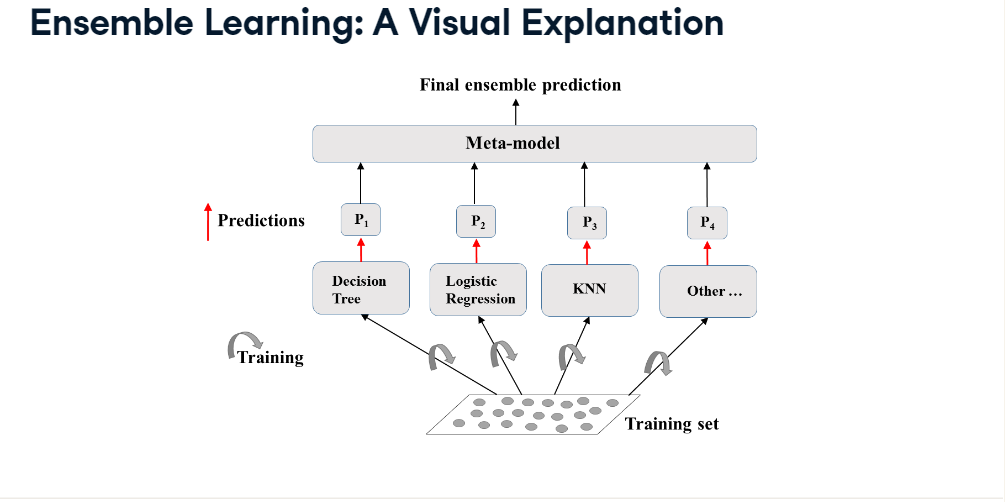

> The meta model makes the final prediction by hard voting

In [51]:
# No na values
cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [52]:
cancer.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=cancer.drop(columns=['diagnosis','Unnamed: 32'])
y=cancer.diagnosis

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
knn=KNeighborsClassifier(n_neighbors=27)
logreg=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=6)
classsifiers=[('logreg',logreg),('knn',knn),('Decision tree',dt)]

In [74]:
for clfname,clf in classsifiers:
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  print('The {} accuracy is {}'.format(clfname,acc))

The logreg accuracy is 0.6374269005847953
The knn accuracy is 0.7134502923976608
The Decision tree accuracy is 0.9590643274853801


In [76]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=classsifiers)
vc.fit(X_train,y_train)
y_pred=vc.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print('Voting Classifier accuracy is ',acc)

Voting Classifier accuracy is  0.7368421052631579
